%% Machine Learning Online Class - Exercise 3 | Part 2: Neural Networks

%  Instructions
%  ------------
% 
%  This file contains code that helps you get started on the
%  linear exercise. You will need to complete the following functions 
%  in this exericse:
%
%     lrCostFunction.m (logistic regression cost function)
%     oneVsAll.m
%     predictOneVsAll.m
%     predict.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.

In [3]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat  
import seaborn as sbs
import matplotlib.image as mpimg
import scipy.optimize as op
%matplotlib inline

In [4]:
def displayData(sel):
    m,n = sel.shape
    example_width = int(np.sqrt(n))
    example_height = int(n/example_width)
    display_rows = int(np.sqrt(m))
    display_cols = int(np.sqrt(m))
    pad = 1;
    display_array = np.ones((pad + display_rows * (example_height + pad),  pad + display_cols * (example_width + pad)))
    curr_ex = 0;
    for j in range(display_rows):
        for i in range(display_cols):
            #% Copy the patch
            #% Get the max value of the patch
            #max_val = max(abs(X(curr_ex, :)));
            array_temp = (sel[curr_ex,:].reshape((example_height,example_width))).T;
            u1=pad + j * (example_height + pad);
            u2=pad + j * (example_height + pad)+example_height;
            v1=pad + i * (example_width + pad);
            v2=pad + i * (example_width + pad)+example_width;
            display_array[u1:u2,v1:v2] = array_temp
            curr_ex = curr_ex + 1;
    return display_array

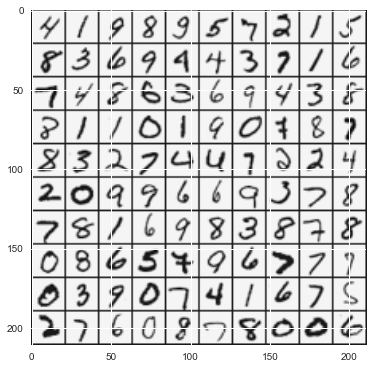

In [49]:
data = loadmat('ex3data1.mat');
X=data['X']
y=data['y']
m,n = X.shape
#% Randomly select 100 data points to display
rand_indices = np.random.permutation(m)
sel = data['X'][rand_indices[0:100], :];
sel.shape
display_array = displayData(sel)
plt.figure(figsize=(6,6))
plt.imshow(display_array)

In [45]:
para = loadmat('ex3weights.mat');
theta1 = np.matrix(para['Theta1'])
theta2 = np.matrix(para['Theta2'])

In [15]:
def sigmoid(z):
    #%SIGMOID Compute sigmoid function
    #%g = SIGMOID(z) computes the sigmoid of z.

    #% You need to return the following variables correctly 
    g = np.matrix(np.zeros(np.shape(z)));

#% ====================== YOUR CODE HERE ======================
#% Instructions: Compute the sigmoid of each value of z (z can be a matrix,vector or scalar).
    g = np.divide(1,(1+np.exp(-z)));    
    return g

In [47]:
def predict(theta1, theta2, X):
    #%PREDICT Predict the label of an input given a trained neural network
    #%   p = PREDICT(Theta1, Theta2, X) outputs the predicted label of X given the
    #%   trained weights of a neural network (Theta1, Theta2)
    m,n = X.shape
    num_labels = theta2.shape[0]
    X = np.c_[np.ones(m), X];
    p = np.zeros((m, 1));
    A= sigmoid(X*theta1.T);
    A = np.c_[np.ones(m),A];
    B = sigmoid(A*theta2.T);
    p=np.argmax(B,1)+1;
    return p


In [50]:
pred = predict(theta1, theta2, X);
accuracy = np.mean((pred==y)*1)*100
print('Training Set Accuracy: %f'% accuracy);

Training Set Accuracy: 97.520000
